In [ ]:
import pandas as pd
import numpy as np

In [ ]:
housing = pd.read_csv('housing.csv', index_col=0)

In [ ]:
b0=1
b1=2
housing['GuessResponse']=b0+b1*housing['RM']

In [57]:
housing['observederror']= housing['MEDV']-housing['GuessResponse']
indices=[7,20,100]
print(housing['observederror'].loc[indices])

7      13.756
20      1.460
100    13.046
Name: observederror, dtype: float64


In [58]:
print(housing.columns)


Index(['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV', 'GuessResponse',
       'observederror'],
      dtype='object')


In [59]:
housing['error'] = housing['MEDV'] - housing['GuessResponse']  # Replace with your calculation logic


In [60]:
print(housing.head())


   LSTAT  INDUS    NOX     RM  MEDV  GuessResponse  observederror   error
0   4.98   2.31  0.538  6.575  24.0         14.150          9.850   9.850
1   9.14   7.07  0.469  6.421  21.6         13.842          7.758   7.758
2   4.03   7.07  0.469  7.185  34.7         15.370         19.330  19.330
3   2.94   2.18  0.458  6.998  33.4         14.996         18.404  18.404
4   5.33   2.18  0.458  7.147  36.2         15.294         20.906  20.906


In [61]:
print('Sum of squared error is', (housing['error'] ** 2).sum())


Sum of squared error is 75291.322588


In [62]:
import statsmodels.formula.api as smf
model = smf.ols(formula='MEDV ~ RM', data=housing).fit()
b0 = model.params.iloc[0] 
b1 = model.params.iloc[0] 
housing['BestResponse']=b0+b1*housing['RM']

In [67]:
print(housing.columns)


Index(['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV'], dtype='object')


In [ ]:
housing['y'] = housing['GuessResponse']  

KeyError: 'GuessResponse'

KeyError: 'y'

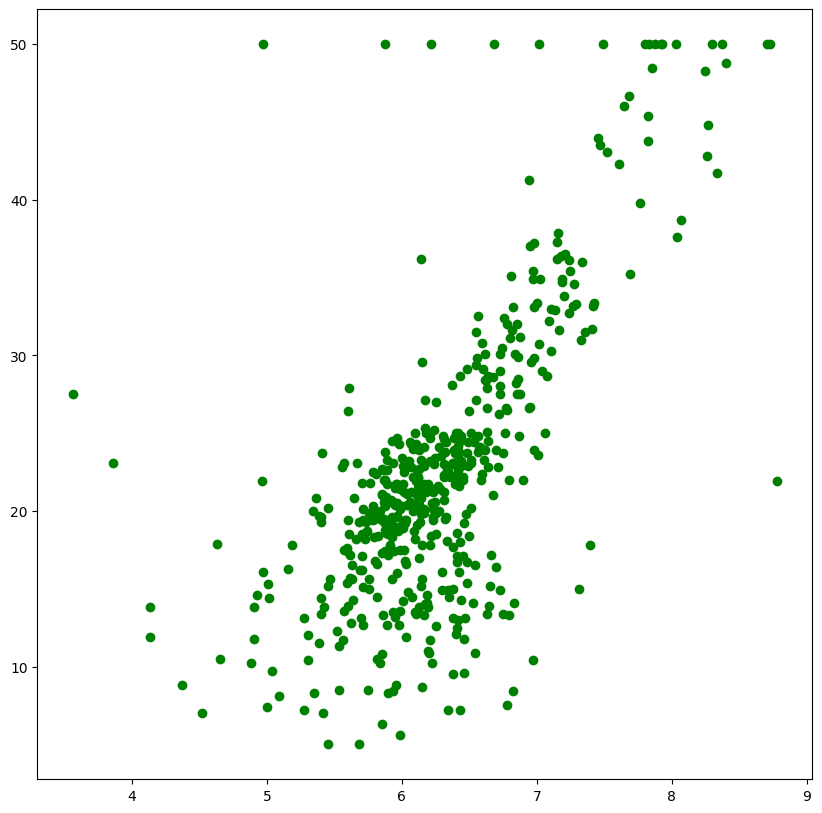

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Real')  # Real data
plt.scatter(housing['RM'], housing['y'], color='b', label='Model')   # Model predictions
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='Model Line')  # Model line
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.show()


In [ ]:
housing['y'] = model.predict(housing)  # Common creation method for predictions
